# Bengaluru house price prediction model

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)

In [2]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df1.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
n_unique = df1.nunique()
print("Number of unique values:\n{}".format(n_unique))

Number of unique values:
area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64


In [7]:
df1.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [8]:
df1.groupby("society")["society"].agg("count")

society
3Codeli    2
7 ise P    1
A idse     2
A rtsai    1
ACersd     1
          ..
Zonce E    2
Zostaa     3
i1ncyRe    1
i1odsne    1
i1rtsCo    3
Name: society, Length: 2688, dtype: int64

In [9]:
df1.groupby("availability")["availability"].agg("count")

availability
14-Jul                      1
14-Nov                      1
15-Aug                      1
15-Dec                      1
15-Jun                      1
                        ...  
22-Mar                      3
22-May                     10
22-Nov                      2
Immediate Possession       16
Ready To Move           10581
Name: availability, Length: 81, dtype: int64

In [10]:
one_hot_encoded_data = pd.get_dummies(df1, columns = ["area_type"])
print(one_hot_encoded_data.iloc[:,7:].head())

    price  area_type_Built-up  Area  area_type_Carpet  Area  \
0   39.07                         0                       0   
1  120.00                         0                       0   
2   62.00                         1                       0   
3   95.00                         0                       0   
4   51.00                         0                       0   

   area_type_Plot  Area  area_type_Super built-up  Area  
0                     0                               1  
1                     1                               0  
2                     0                               0  
3                     0                               1  
4                     0                               1  


In [11]:
df2 = df1.drop(["society"],axis = "columns")

### Data Cleaning

In [12]:
df2.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [13]:
df2[['size', 'balcony']] = df2[['size', 'balcony']].fillna(df2[['size', 'balcony']].median(numeric_only =None))

C:\Users\Naveen\AppData\Local\Temp\ipykernel_3112\2835098393.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2[['size', 'balcony']] = df2[['size', 'balcony']].fillna(df2[['size', 'balcony']].median(numeric_only =None))


In [14]:
df2.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [15]:
df3 = df2.dropna()
df3.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [16]:
unique_bhk_size = df3["size"].unique()
n_unique_bhk_size = df3["size"].nunique()
print("Unique values:\n{}".format(unique_bhk_size))
print("Number of unique values:\n{}".format(n_unique_bhk_size))

Unique values:
['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' '9 Bedroom' '27 BHK' '10 Bedroom'
 '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom' '14 BHK' '8 BHK'
 '12 Bedroom' '13 BHK' '18 Bedroom']
Number of unique values:
31


In [17]:
df3["size"].nunique()

31

In [18]:
#df3["bhk"] = df3.loc("size").apply(lambda x: x.split()[0])
# https://www.kdnuggets.com/2019/06/select-rows-columns-pandas.html
#df3["bhk"] = df3.loc[:,("size")].apply(lambda x: int(x.split()[0]))
df3["bhk"] = df3["size"].apply(lambda x: int(x.split()[0]))

C:\Users\Naveen\AppData\Local\Temp\ipykernel_3112\2292445898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["bhk"] = df3["size"].apply(lambda x: int(x.split()[0]))


In [19]:
df3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [20]:
unique_bhk = df3["bhk"].unique()
n_unique_bhk = df3["bhk"].nunique()
print("Unique values:\n{}".format(unique_bhk))
print("Number of unique values:\n{}".format(n_unique_bhk))

Unique values:
[ 2  4  3  6  1  8  7  5 11  9 27 10 19 16 43 14 12 13 18]
Number of unique values:
19


In [21]:
df3[df3.bhk > 15]

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
3379,Super built-up Area,Ready To Move,1Hanuman Nagar,19 BHK,2000,16.0,2.0,490.0,19
3609,Super built-up Area,Ready To Move,Koramangala Industrial Layout,16 BHK,10000,16.0,2.0,550.0,16
4684,Plot Area,Ready To Move,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43
11559,Plot Area,18-Apr,1Kasavanhalli,18 Bedroom,1200,18.0,2.0,200.0,18


In [22]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [23]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

### Find wrong format values and mismatched values

In [24]:
# df3[df3["total_sqft"].apply(is_float)]
df3[~df3["total_sqft"].apply(is_float)].head(15)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,18-Mar,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,18-Sep,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
648,Built-up Area,Ready To Move,Arekere,9 Bedroom,4125Perch,9.0,2.0,265.000,9
661,Super built-up Area,Ready To Move,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Built-up Area,18-Mar,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4


In [25]:
df3[~df3["total_sqft"].apply(is_float)].tail(10)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
12544,Super built-up Area,Ready To Move,Hebbal,4 BHK,4000 - 4450,6.0,0.0,359.000,4
12560,Super built-up Area,18-Dec,Hosa Road,3 BHK,142.84Sq. Meter,3.0,1.0,110.000,3
12652,Plot Area,Ready To Move,Billamaranahalli,2 Bedroom,300Sq. Yards,2.0,2.0,150.000,2
12791,Super built-up Area,22-Dec,Bannerghatta Road,2 BHK,1115 - 1130,2.0,0.0,61.740,2
12955,Super built-up Area,18-Nov,Thanisandra,3 BHK,1437 - 1629,3.0,0.0,75.885,3
12975,Super built-up Area,20-Aug,Whitefield,2 BHK,850 - 1060,2.0,0.0,38.190,2
12990,Super built-up Area,18-May,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000,3
13059,Super built-up Area,Ready To Move,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760,2
13265,Super built-up Area,20-Sep,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135,2
13299,Super built-up Area,18-Dec,Whitefield,4 BHK,2830 - 2882,5.0,0.0,154.500,4


In [26]:
df3[~df3["total_sqft"].apply(is_float)].shape

(190, 9)

In [27]:
def convert_sqft_to_num(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [28]:
convert_sqft_to_num("6966")

6966.0

In [29]:
convert_sqft_to_num("1437 - 1629")

1533.0

In [30]:
df4 = df3.copy()
df4["total_sqft"] = df4["total_sqft"].apply(convert_sqft_to_num)
df4.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [31]:
df4[~df4["total_sqft"].apply(is_float)].shape

(0, 9)

In [32]:
df4.loc[30]

area_type       Super built-up  Area
availability                  19-Dec
location                   Yelahanka
size                           4 BHK
total_sqft                    2475.0
bath                             4.0
balcony                          0.0
price                          186.0
bhk                                4
Name: 30, dtype: object

### Feature Engineering and Dimentionality reduction

### Creating a new feature price_per_sqft

In [33]:
df5 = df4.copy()
df5["price_per_sqft"] = df5["price"]*100000/df5["total_sqft"]

In [34]:
df5.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [35]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [36]:
# High dimentionality will cause dimentionality curse
len(df5.location.unique())

1304

In [37]:
len(df5.area_type.unique())

4

In [38]:
len(df5.availability.unique())

80

### Dimentionality reduction

#### ***Working with Location Column***

In [39]:
df5.location = df5.location.apply(lambda x: x.strip())

location_statistics = df5.groupby('location')["location"].agg("count").sort_values(ascending = False)
location_statistics

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [40]:
location_threshold = 10
len(location_statistics[location_statistics <= location_threshold])

1052

In [41]:
location_count_less_than_th = location_statistics[location_statistics <= location_threshold]
location_count_less_than_th

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [42]:
# After removing the spaces from the location names
len(df5.location.unique())

1293

In [43]:
df5.location = df5.location.apply(lambda x: "other" if x in location_count_less_than_th else x)

In [44]:
len(df5.location.unique())

242

#### ***Working with Area_Type Column***

In [45]:
df5.area_type = df5.area_type.apply(lambda x: x.strip())

area_type_statistics = df5.groupby('area_type')["area_type"].agg("count").sort_values(ascending = False)
area_type_statistics

area_type
Super built-up  Area    8740
Built-up  Area          2410
Plot  Area              2009
Carpet  Area              87
Name: area_type, dtype: int64

In [46]:
df5.area_type = df5.area_type.apply(lambda x: x.strip())

availability_statistics = df5.groupby('availability')["availability"].agg("count").sort_values(ascending = False)
availability_statistics

availability
Ready To Move    10564
18-Dec             297
18-May             291
18-Apr             269
18-Aug             200
                 ...  
16-Oct               1
16-Nov               1
16-Jul               1
16-Jan               1
14-Jul               1
Name: availability, Length: 80, dtype: int64

#### ***Working with Availability Column in Dimentionality Reduction***

In [47]:
len(df5[df5.availability == "Ready To Move"])

10564

In [48]:
#ready_to_move_availability = df5[df5.availability == "Ready To Move"]
#ready_to_move_availability = availability_statistics[availability_statistics == "Ready To Move"]
ready_to_move_threshold = 500
future_dates = availability_statistics[availability_statistics <= ready_to_move_threshold]
future_dates

availability
18-Dec    297
18-May    291
18-Apr    269
18-Aug    200
19-Dec    183
         ... 
16-Oct      1
16-Nov      1
16-Jul      1
16-Jan      1
14-Jul      1
Name: availability, Length: 79, dtype: int64

In [49]:
len(future_dates.unique())

39

In [50]:
df5.availability = df5.availability.apply(lambda x: "Future Date" if x in future_dates else x)

In [51]:
len(df5.availability.unique())

2

In [52]:
df5.availability.unique()

array(['Future Date', 'Ready To Move'], dtype=object)

### Analysing and Removing the Outliers

In [53]:
df5.head(10)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Future Date,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
6,Super built-up Area,Future Date,Old Airport Road,4 BHK,2732.0,4.0,2.0,204.00,4,7467.057101
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,3300.0,4.0,2.0,600.00,4,18181.818182
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,4828.244275
9,Plot Area,Ready To Move,other,6 Bedroom,1020.0,6.0,2.0,370.00,6,36274.509804


#### Comparing Total Square Feet of the land of the house and number of bedrooms to find the outlier
660/6 = 110 sqft

In [54]:
df5[df5.total_sqft/df5.bhk < 300].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,Plot Area,Ready To Move,other,6 Bedroom,1020.0,6.0,2.0,370.0,6,36274.509804
45,Plot Area,Ready To Move,HSR Layout,8 Bedroom,600.0,9.0,2.0,200.0,8,33333.333333
58,Plot Area,Ready To Move,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,Ready To Move,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,Ready To Move,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000


In [55]:
len(df5[df5.total_sqft/df5.bhk < 300])

744

In [56]:
df5.shape

(13246, 10)

In [57]:
# Removing the rows that has less than 300 sqft when divided with BHK of a house with Sqft of the house
df6 = df5[~(df5.total_sqft/df5.bhk < 300)]
df6.shape

(12502, 10)

In [58]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [59]:
df_num = df6.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1056.0,2.0,1.0,39.07,2,3699.810606
1,2600.0,5.0,3.0,120.00,4,4615.384615
2,1440.0,2.0,3.0,62.00,3,4305.555556
3,1521.0,3.0,1.0,95.00,3,6245.890861
4,1200.0,2.0,1.0,51.00,2,4250.000000


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

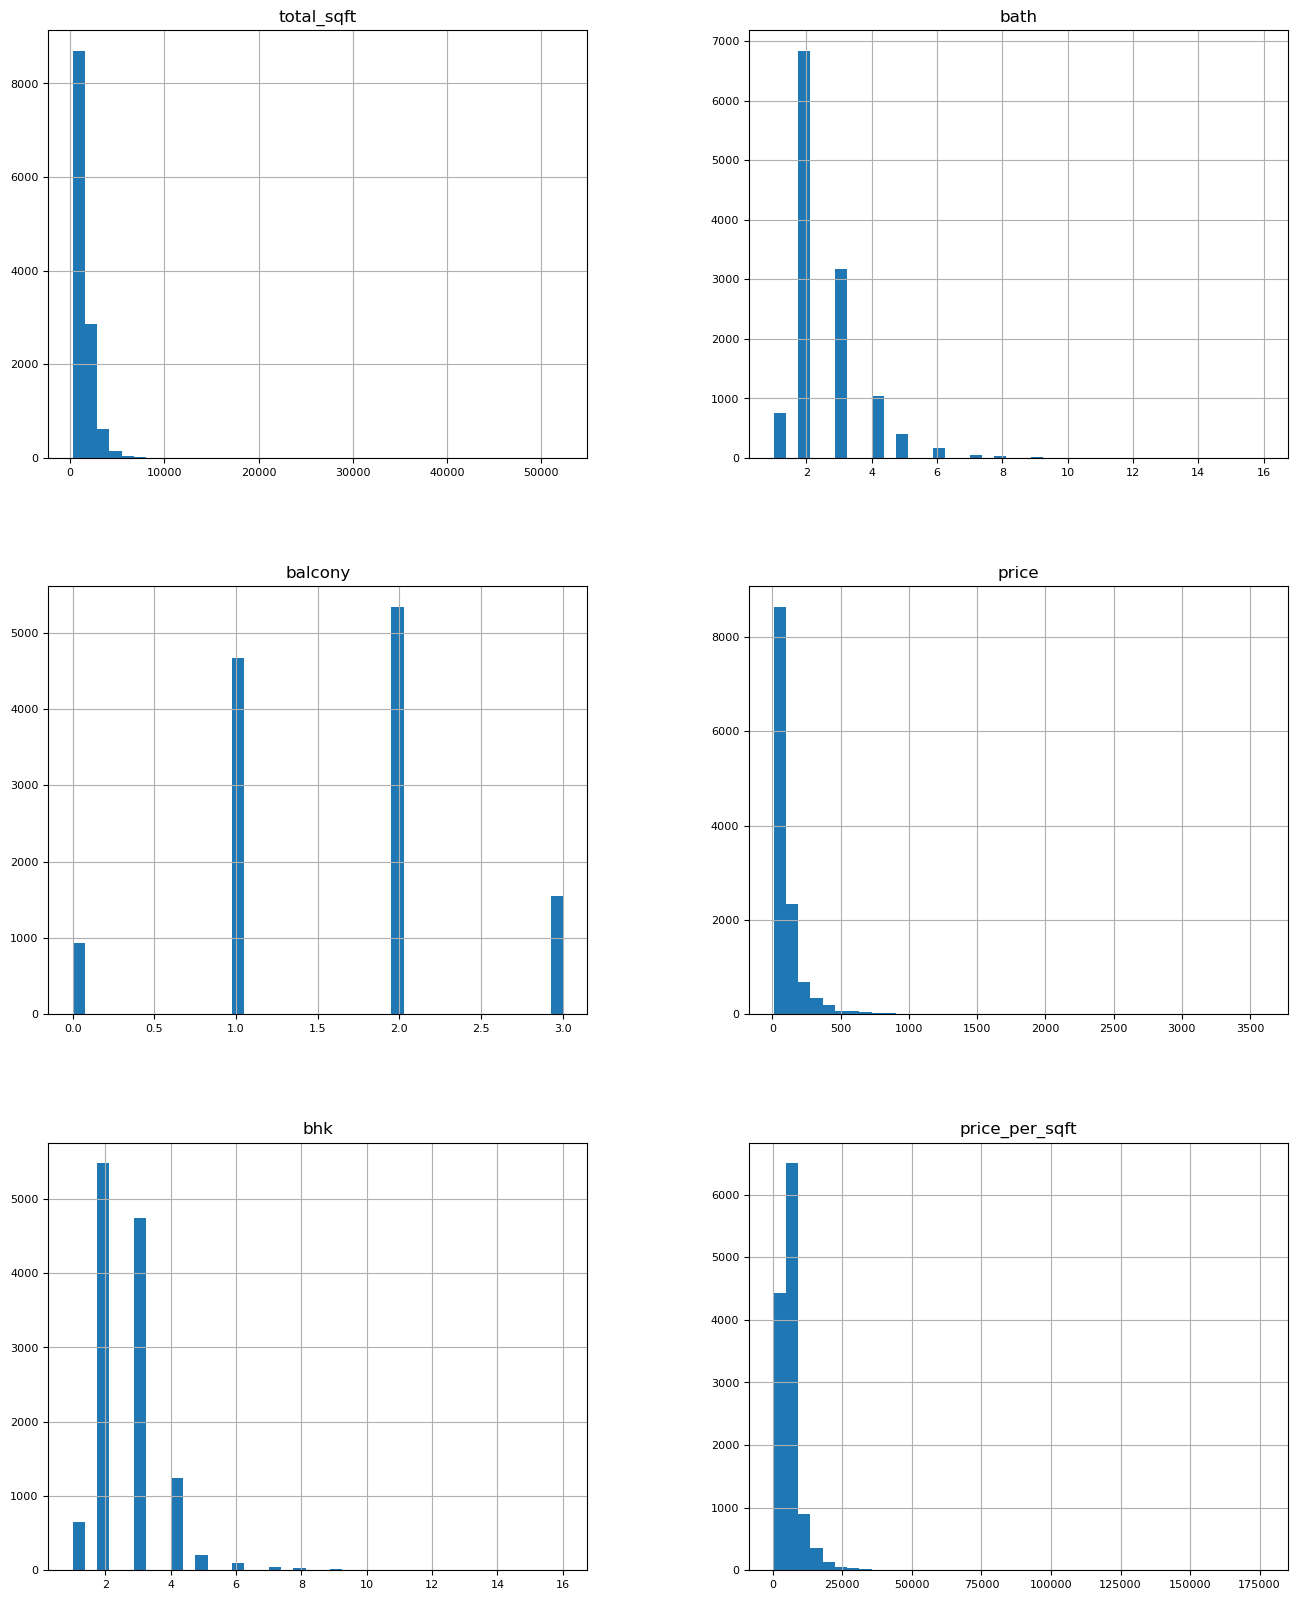

In [77]:
df_num.hist(figsize=(16, 20), bins=40, xlabelsize=8, ylabelsize=8);

count    12502.000000
mean       111.311915
std        152.089966
min          9.000000
25%         49.000000
50%         70.000000
75%        115.000000
max       3600.000000
Name: price, dtype: float64


C:\Users\Naveen\AppData\Local\Temp\ipykernel_3112\2421904812.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df6['price']*100000, color='g', bins=100, hist_kws={'alpha': 0.4});


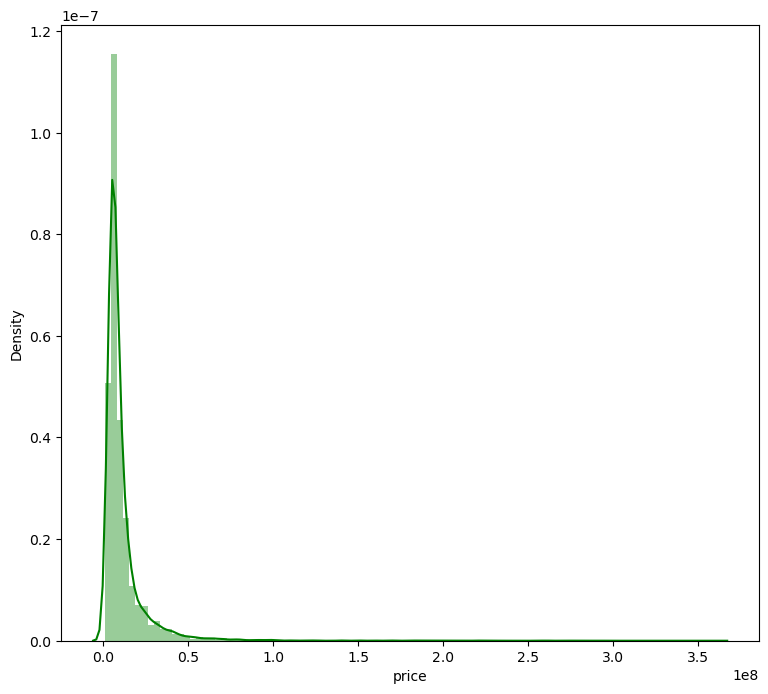

In [62]:
print(df6['price'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df6['price']*100000, color='g', bins=100, hist_kws={'alpha': 0.4});

count    12502.000000
mean       111.311915
std        152.089966
min          9.000000
25%         49.000000
50%         70.000000
75%        115.000000
max       3600.000000
Name: price, dtype: float64


[Text(0.5, 0, 'price in lacks'), Text(0, 0.5, 'distribution')]

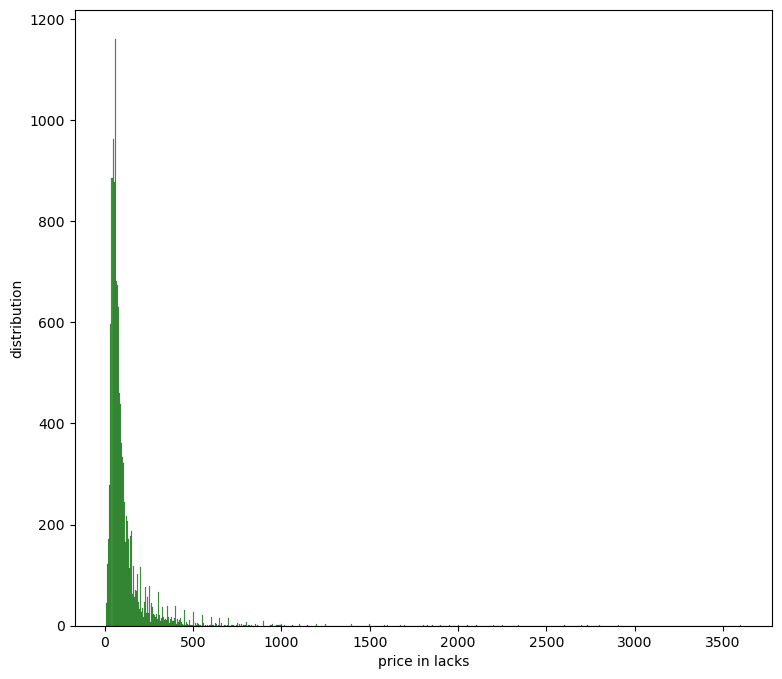

In [63]:
print(df6['price'].describe())
plt.figure(figsize=(9, 8))
ax = sns.histplot(df6['price'], color='g');
ax.set(xlabel='price in lacks', ylabel='distribution')

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64


[Text(0.5, 0, 'price per sqft'), Text(0, 0.5, 'distribution')]

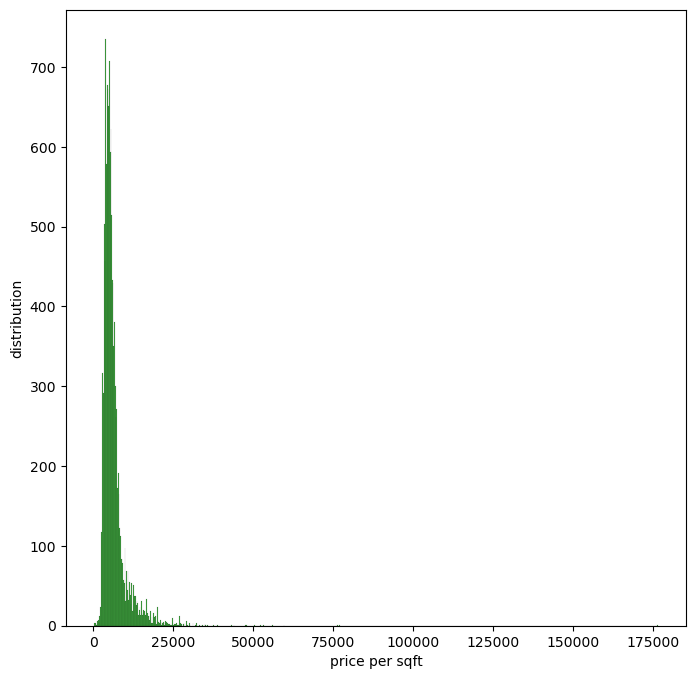

In [72]:
print(df6['price_per_sqft'].describe())
plt.figure(figsize=(8, 8))
ax = sns.histplot(df6['price_per_sqft'], color='g');
ax.set(xlabel='price per sqft', ylabel='distribution')

In [65]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m =np.mean(subdf.price_per_sqft)
        stdev =np.std(subdf.price_per_sqft)
        for i in range(10):
            #print("mean :{}, std : {} ".format(m, stdev))
            #print("price_per_sqft :{}, mean-standard-deviation : {} ,mean+standard-deviation : {} ".format(subdf.price_per_sqft.sum(), m-stdev, m+stdev))
            break
        reduced_df = subdf[(subdf.price_per_sqft > (m-stdev)) & (subdf.price_per_sqft < (m+stdev))]
        df_out = pd.concat([df_out, reduced_df],ignore_index = True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape
        

(10241, 10)

#### Compare between BHK house price difference

In [66]:
len(df7["location"].unique())

242

In [67]:
location = "Hosa Road" 
df7[(df7["location"] == location) & (df7["bhk"] == 2)].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
3320,Super built-up Area,Future Date,Hosa Road,2 BHK,1161.0,2.0,1.0,55.15,2,4750.215332
3322,Super built-up Area,Future Date,Hosa Road,2 BHK,1161.0,2.0,1.0,55.15,2,4750.215332
3323,Super built-up Area,Ready To Move,Hosa Road,2 BHK,1365.0,2.0,1.0,92.00,2,6739.926740
3324,Super built-up Area,Ready To Move,Hosa Road,2 BHK,1243.0,2.0,2.0,48.50,2,3901.850362
3329,Super built-up Area,Future Date,Hosa Road,2 BHK,1133.0,2.0,1.0,52.00,2,4589.585172


In [68]:
location = "Hosa Road" 
df7[(df7["location"] == location) & (df7["bhk"] == 3)].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
3318,Super built-up Area,Ready To Move,Hosa Road,3 BHK,1652.0,3.0,2.0,85.00,3,5145.278450
3319,Super built-up Area,Future Date,Hosa Road,3 BHK,1639.0,3.0,1.0,80.00,3,4881.025015
3321,Super built-up Area,Future Date,Hosa Road,3 BHK,1726.0,3.0,2.0,81.99,3,4750.289687
3325,Super built-up Area,Future Date,Hosa Road,3 BHK,1541.0,3.0,1.0,69.84,3,4532.121999
3326,Super built-up Area,Future Date,Hosa Road,3 BHK,1332.0,2.0,1.0,86.12,3,6465.465465


In [78]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    
    matplotlib.rcParams["figure.figsize"] = (12,8)
    
    plt.scatter(bhk2.total_sqft, bhk2.price_per_sqft, color = "blue", marker = "o",label = "2 BHK", s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price_per_sqft, color = "red", marker = '^',label = "3 BHK", s = 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()
    plt.show()

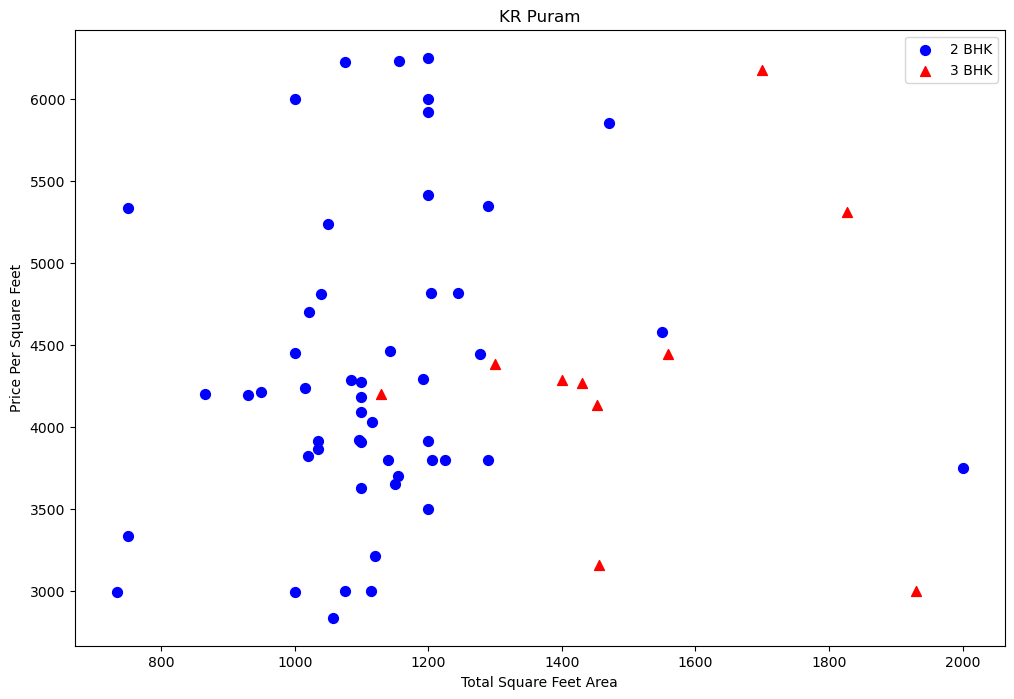

In [79]:
plot_scatter_chart(df7, "KR Puram")

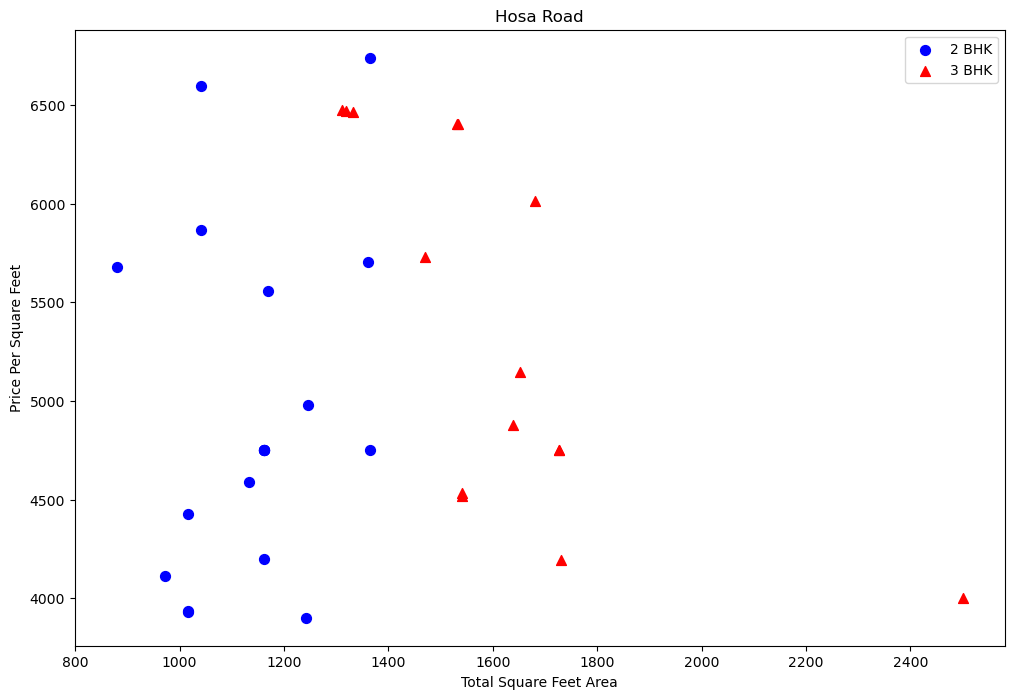

In [80]:
plot_scatter_chart(df7, "Hosa Road")

In [81]:
def plot_scatter_chart_price(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    
    matplotlib.rcParams["figure.figsize"] = (12,8)
    
    plt.scatter(bhk2.total_sqft, bhk2.price, color = "blue", marker = "o",label = "2 BHK", s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color = "red", marker = '^',label = "3 BHK", s = 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()
    plt.show()

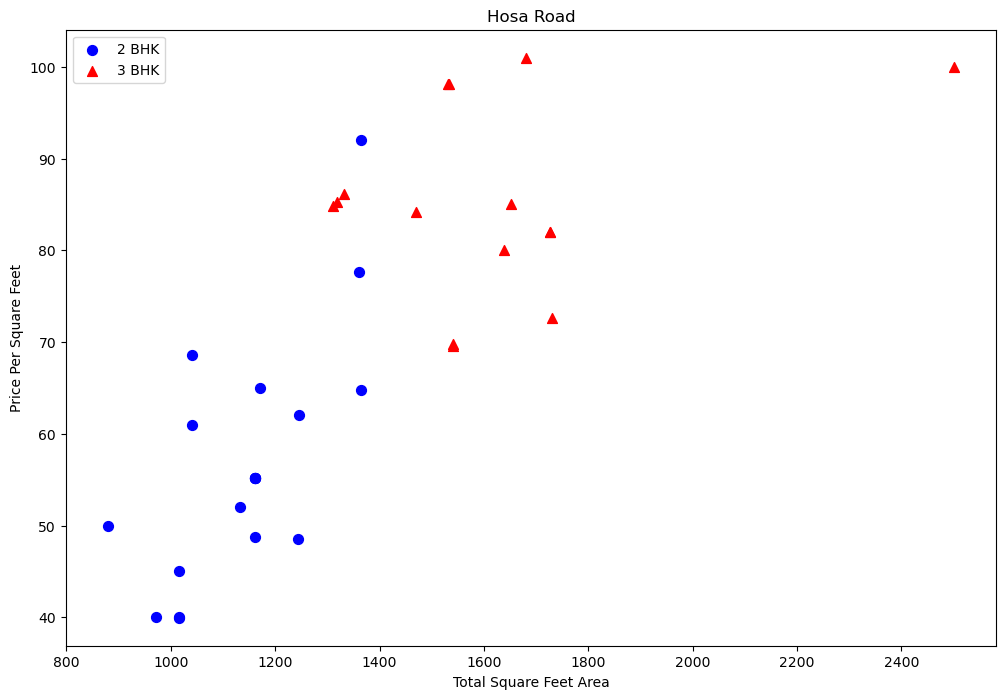

In [82]:
plot_scatter_chart_price(df7, "Hosa Road")

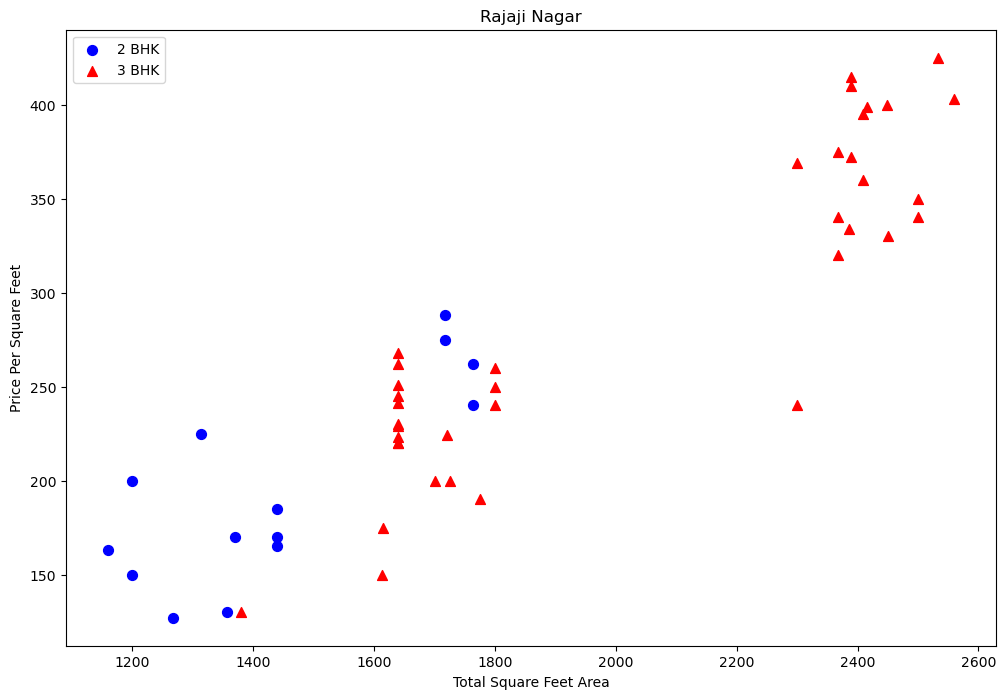

In [83]:
plot_scatter_chart_price(df7, "Rajaji Nagar")

In [104]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby("location"):
        bhk_stats = {}
        
        for bhk, bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk] = {
                "mean" : np.mean(bhk_df.price_per_sqft),
                "std" : np.std(bhk_df.price_per_sqft),
                "count" : bhk_df.shape[0]
            }
            
        for bhk, bhk_df in location_df.groupby("bhk"):
            stats = bhk_stats.get(bhk-1)
            if stats and stats["count"] > 5:
                exclude_indices = np.append(exclude_indices, \
                                            bhk_df[bhk_df.price_per_sqft <(stats["mean"])].index.values)

    return df.drop(exclude_indices, axis = "index")

In [105]:
df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 10)

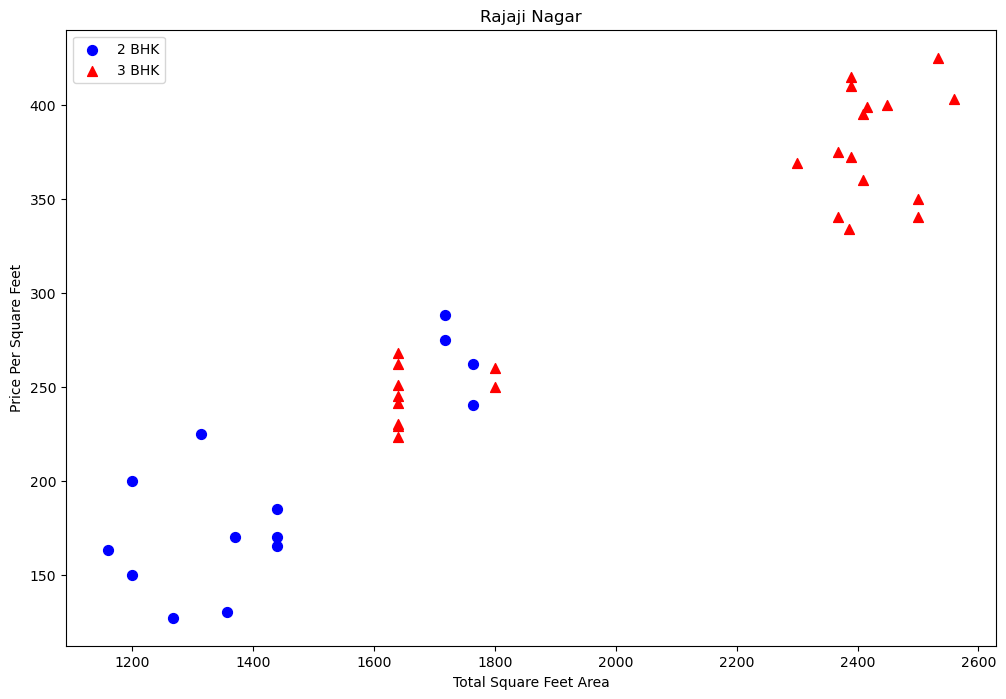

In [107]:
plot_scatter_chart_price(df8, "Rajaji Nagar")

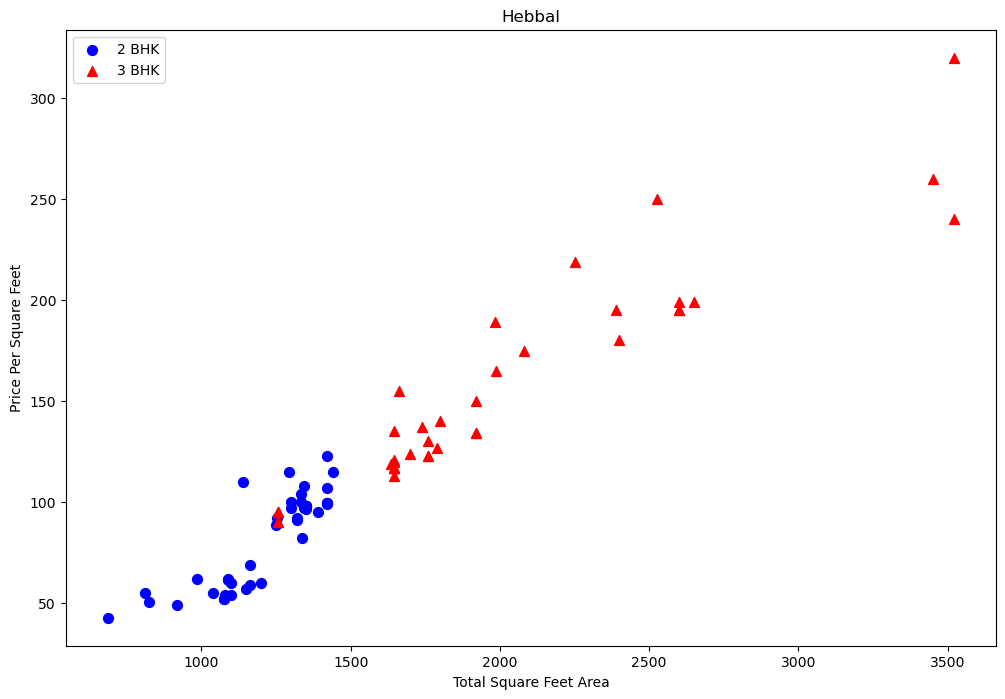

In [108]:
plot_scatter_chart_price(df8, "Hebbal")

Text(0, 0.5, 'Count')

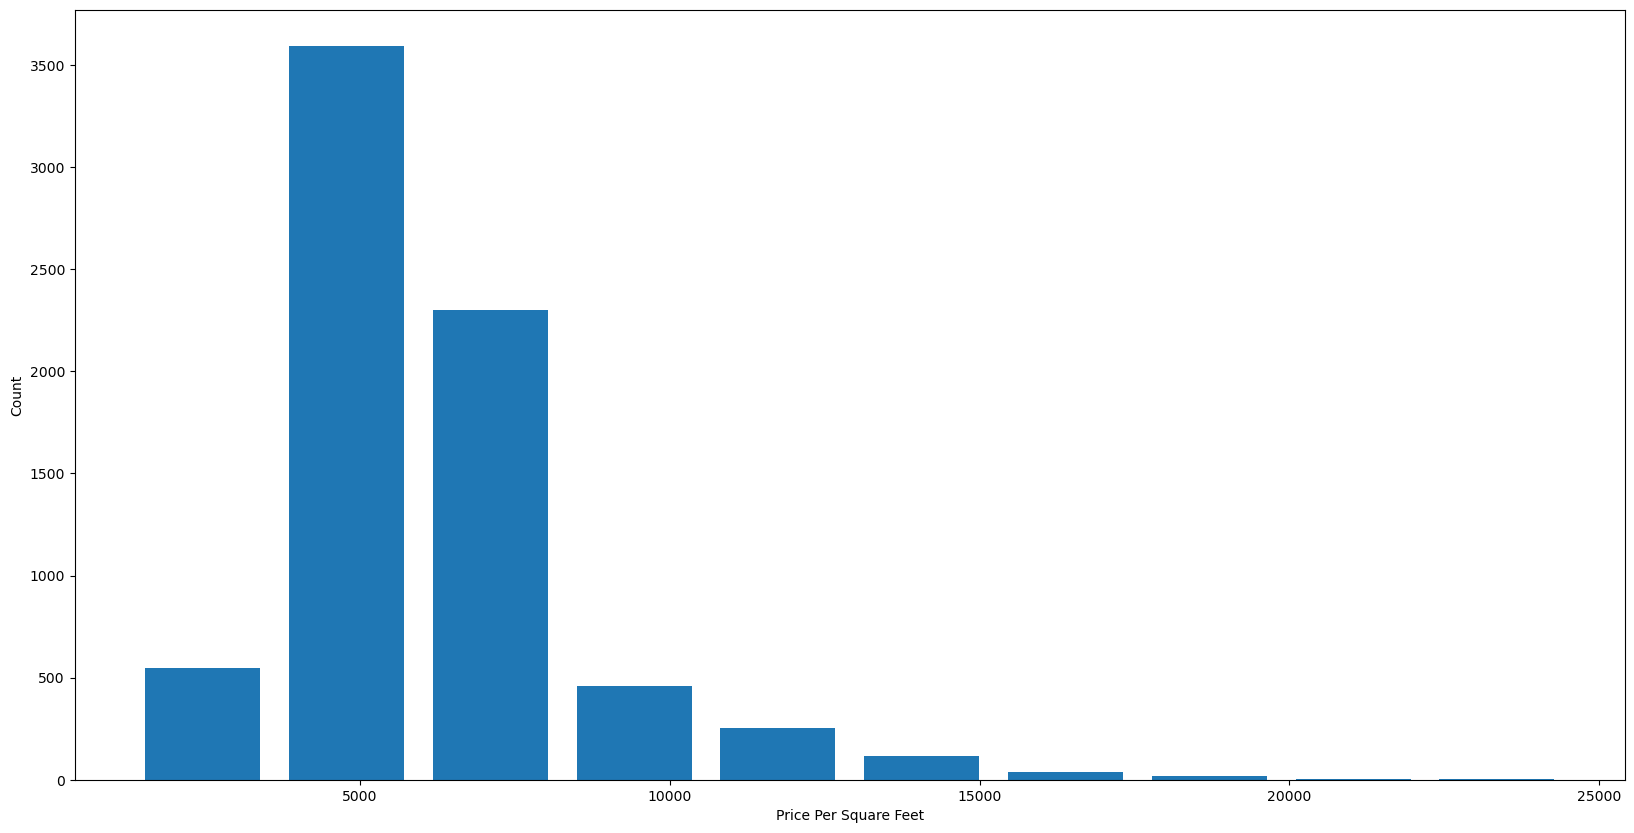

In [109]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)
plt.hist(df8.price_per_sqft, rwidth = 0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [112]:
df8.price_per_sqft.describe()

count     7329.000000
mean      6124.960960
std       2408.673991
min       1300.000000
25%       4598.384728
50%       5680.000000
75%       6896.551724
max      24509.803922
Name: price_per_sqft, dtype: float64

In [125]:
bathrooms = df8.bath.unique()
bathrooms[::-1]

array([13., 16., 12.,  9.,  7.,  6.,  1.,  8.,  5.,  2.,  3.,  4.])

In [126]:
df8[df8.bath > 10]

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
5277,Super built-up Area,Ready To Move,Neeladri Nagar,10 BHK,4000.0,12.0,2.0,160.0,10,4000.000000
8486,Super built-up Area,Ready To Move,other,10 BHK,12000.0,12.0,2.0,525.0,10,4375.000000
8575,Super built-up Area,Ready To Move,other,16 BHK,10000.0,16.0,2.0,550.0,16,5500.000000
9308,Super built-up Area,Ready To Move,other,11 BHK,6000.0,12.0,2.0,150.0,11,2500.000000
9639,Super built-up Area,Ready To Move,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


In [128]:
df8[df8.bath > 10].shape[0]

5